# Introduction to LangChain v0.2.0 and LCEL: LangChain Powered RAG

In the following notebook we're going to focus on learning how to navigate and build useful applications using LangChain, specifically LCEL, and how to integrate different APIs together into a coherent RAG application!

In the notebook, you'll complete the following Tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables
  3. Initialize a Simple Chain using LCEL
  4. Implement Naive RAG using LCEL
  
Let's get started!



# 🤝 Breakout Room #1

## Task 1: Installing Required Libraries

One of the [key features](https://blog.langchain.dev/langchain-v02-leap-to-stability/) of LangChain v0.2.0 is the compartmentalization of the various LangChain ecosystem packages and added stability.

Instead of one all encompassing Python package - LangChain has a `core` package and a number of additional supplementary packages.

We'll start by grabbing all of our LangChain related packages!

In [ ]:
!pip install -qU langchain langchain-core langchain-community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


Now we can get our Qdrant dependencies!

In [ ]:
!pip install -qU qdrant-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.1 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-aiplatfor

Let's finally get `tiktoken` and `pymupdf` so we can leverage them later on!

In [ ]:
!pip install -qU tiktoken pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 42.7 MB/s eta 0:00:00


## Task 2: Set Environment Variables

We'll be leveraging OpenAI's suite of APIs - so we'll set our `OPENAI_API_KEY` `env` variable here!

In [3]:
import os
#import getpass

#os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

## Task 3: Initialize a Simple Chain using LCEL

The first thing we'll do is familiarize ourselves with LCEL and the specific ins and outs of how we can use it!

### LLM Orchestration Tool (LangChain)

Let's dive right into [LangChain](https://www.langchain.com/)!

The first thing we want to do is create an object that lets us access OpenAI's `gpt-4o` model.

In [4]:
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic

openai_chat_model = ChatOpenAI(model="gpt-4o")
anthropic_chat_model = ChatAnthropic(model="claude-3-5-sonnet-20240620")


####❓ Question #1:

What other models could we use, and how would the above code change?

####### Answer
We can support langchain based model loader like openai and anthropic. With these we can load  gpt-4o, gpt-4o-mini etc.,
There is more that can be supported like HuggingFace, Azure, Groq, and many more.

> HINT: Check out [this page](https://platform.openai.com/docs/models) to find the answer!

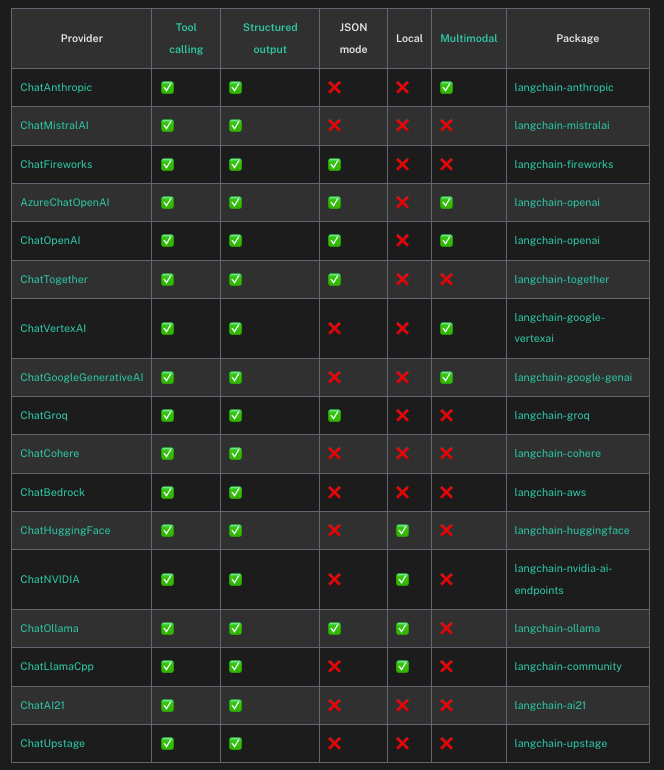

### Prompt Template

Now, we'll set up a prompt template - more specifically a `ChatPromptTemplate`. This will let us build a prompt we can modify when we call our LLM!

In [5]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "You are a legendary and mythical Wizard. You speak in riddles and make obscure and pun-filled references to exotic cheeses."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

### Our First Chain

Now we can set up our first chain!

A chain is simply two components that feed directly into eachother in a sequential fashion!

You'll notice that we're using the pipe operator `|` to connect our `chat_prompt` to our `llm`.

This is a simplified method of creating chains and it leverages the LangChain Expression Language, or LCEL.

You can read more about it [here](https://python.langchain.com/v0.2/docs/concepts/#langchain-expression-language-lcel), but there a few features we should be aware of out of the box (taken directly from LangChain's documentation linked above):

- **Async, Batch, and Streaming Support** Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

- **Fallbacks** The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

- **Parallelism** Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

In the following code cell we have two components:

- `chat_prompt`, which is a formattable `ChatPromptTemplate` that contains a system message and a human message.
- `openai_chat_model`, which is a LangChain Runnable wrapped OpenAI client.

We'd like to be able to pass our own `content` (as found in our `human_template`) and then have the resulting message pair sent to our model and responded to!

In [6]:
chain = chat_prompt | openai_chat_model

Notice the pattern here:

We invoke our chain with the `dict` `{"content" : "Hello world!"}`.

It enters our chain:

`{"content" : "Hello world!"}` -> `invoke()` -> `chat_prompt`

Our `chat_prompt` returns a `PromptValue`, which is the formatted prompt. We then "pipe" the output of our `chat_prompt` into our `llm`.

`PromptValue` -> `|` -> `llm`

Our `llm` then takes the list of messages and provides an output which is return as a `str`!







In [7]:
print(chain.invoke({"content": "Hello world!"}))

content='Greetings, seeker of the arcane! You have ventured into the realm of the mystic curds. Tell me, what stirs the cauldron of your curiosity today? Perhaps you seek the wisdom of the ages, or the secrets hidden within a wheel of Roquefort?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 38, 'total_tokens': 96}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_157b3831f5', 'finish_reason': 'stop', 'logprobs': None} id='run-9bf4555a-6e52-409c-9823-26193fc7c9ba-0' usage_metadata={'input_tokens': 38, 'output_tokens': 58, 'total_tokens': 96}


Let's try it out with a different prompt!

In [8]:
chain.invoke({"content" : "Could I please have some advice on how to become a better Python Programmer?"})

AIMessage(content='Ah, seeker of serpentine wisdom, you wish to coil yourself around the language of the Python! To ascend the ladder of code and become a true Pythonic wizard, heed my words, for they are aged like the finest Roquefort.\n\nFirstly, immerse yourself in the spellbook of "The Zen of Python," which whispers its secrets through the `import this` incantation. Let its aphorisms be as clear to you as a slice of Gouda under the midday sun.\n\nNext, surround yourself with the enchanted scrolls of documentation, as rich and varied as a platter of Camembert, for the official Python docs hold the curds and whey of wisdom.\n\nPractice, young coder, practice! Like kneading the dough for a fine Halloumi, your skills will only become more elastic and satisfying through repeated effort. Engage in coding challenges, for they are your crucible, melting you into a sharper blade.\n\nSeek the counsel of elders in the realms of GitHub and Stack Overflow, where the knowledge flows thick as a f

Notice how we specifically referenced our `content` format option!

Now that we have the basics set up - let's see what we mean by "Retrieval Augmented" Generation.

## Naive RAG - Manually adding context through the Prompt Template

Let's look at how our model performs at a simple task - defining what LangChain is!

We'll redo some of our previous work to change the `system_template` to be less...verbose.

In [9]:
system_template = "You are a helpful assistant."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"content" : "Please define LangChain."}))

content='LangChain is a framework designed for developing applications that integrate with large language models (LLMs). It provides a structured way to harness the capabilities of LLMs, making it easier for developers to build applications that can understand and generate human-like text. LangChain emphasizes several key areas:\n\n1. **LLM Wrappers**: These are interfaces that allow developers to connect with various LLMs, simplifying the process of sending and receiving text data.\n\n2. **Prompt Management**: This involves tools and techniques for crafting effective prompts to guide the behavior of LLMs, improving the relevance and accuracy of their outputs.\n\n3. **Memory Management**: LangChain includes mechanisms for managing and storing conversational context, enabling the creation of applications that can maintain state and context over multiple interactions.\n\n4. **Indexes**: These are structures that allow for efficient storage and retrieval of information, supporting the cre

Well, that's not very good - is it!

The issue at play here is that our model was not trained on the idea of "LangChain", and so it's left with nothing but a guess - definitely not what we want the answer to be!

Let's ask another simple LangChain question!

In [10]:
print(chat_chain.invoke({"content" : "What is LangChain Expression Language (LECL)?"}))

content='LangChain Expression Language (LECL) is a specialized query language designed to facilitate complex data querying and manipulation within the LangChain framework. LangChain is a framework tailored for developing applications powered by large language models (LLMs), making it easier to integrate such models into various applications. LECL enhances this capability by providing a robust, flexible language for querying and transforming data, enabling developers to effectively harness the power of LLMs for tasks such as data retrieval, filtering, and analysis.\n\nBy using LECL, developers can write concise and expressive queries that can interact seamlessly with the LangChain ecosystem, improving the efficiency and functionality of applications that rely on large language models. This makes it a valuable tool for anyone looking to leverage LLMs in sophisticated data-driven applications.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 153

While it provides a confident response, that response is entirely ficticious! Not a great look, OpenAI!

However, let's see what happens when we rework our prompts - and we add the content from the docs to our prompt as context.

In [11]:
HUMAN_TEMPLATE = """
#CONTEXT:
{context}

QUERY:
{query}

Use the provide context to answer the provided user query. Only use the provided context to answer the query. If you do not know the answer, response with "I don't know"
"""

CONTEXT = """
LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at every step. With LCEL, all steps are automatically logged to LangSmith for maximal observability and debuggability.
"""

chat_prompt = ChatPromptTemplate.from_messages([
    ("human", HUMAN_TEMPLATE)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"query" : "What is LangChain Expression Language?", "context" : CONTEXT}))

content='LangChain Expression Language (LCEL) is a declarative way to easily compose chains together. It offers several benefits, including support for async, batch, and streaming operations, fallbacks for handling errors gracefully, automatic parallelism for components that can be run in parallel, and seamless integration with LangSmith for tracing and observability.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 274, 'total_tokens': 340}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_a2ff031fb5', 'finish_reason': 'stop', 'logprobs': None} id='run-b04cb490-4eba-4423-ae50-b3158bfbc134-0' usage_metadata={'input_tokens': 274, 'output_tokens': 66, 'total_tokens': 340}


You'll notice that the response is much better this time. Not only does it answer the question well - but there's no trace of confabulation (hallucination) at all!

> NOTE: While RAG is an effective strategy to *help* ground LLMs, it is not nearly 100% effective. You will still need to ensure your responses are factual through some other processes

That, in essence, is the idea of RAG. We provide the model with context to answer our queries - and rely on it to translate the potentially lengthy and difficult to parse context into a natural language answer!

However, manually providing context is not scalable - and doesn't really offer any benefit.

Enter: Retrieval Pipelines.

## Task #4: Implement Naive RAG using LCEL

Now we can make a naive RAG application that will help us bridge the gap between our Pythonic implementation and a fully LangChain powered solution!

## Putting the R in RAG: Retrieval 101

In order to make our RAG system useful, we need a way to provide context that is most likely to answer our user's query to the LLM as additional context.

Let's tackle an immediate problem first: The Context Window.

All (most) LLMs have a limited context window which is typically measured in tokens. This window is an upper bound of how much stuff we can stuff in the model's input at a time.

Let's say we want to work off of a relatively large piece of source data - like the Ultimate Hitchhiker's Guide to the Galaxy. All 898 pages of it!

> NOTE: It is recommended you do not run the following cells, they are purely for demonstrative purposes.

In [12]:
context = """
EVERY HITCHHIKER'S GUIDE BOOK
"""

We can leverage our tokenizer to count the number of tokens for us!

In [13]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4o")

In [14]:
len(enc.encode(context))

12

The full set comes in at a whopping *636,144* tokens.

So, we have too much context. What can we do?

Well, the first thing that might enter your mind is: "Use a model with more context window", and we could definitely do that! However, even `gpt-4-128k` wouldn't be able to fit that whole text in the context window at once.

So, we can try splitting our document up into little pieces - that way, we can avoid providing too much context.

We have another problem now.

If we split our document up into little pieces, and we can't put all of them in the prompt. How do we decide which to include in the prompt?!

> NOTE: Content splitting/chunking strategies are an active area of research and iterative developement. There is no "one size fits all" approach to chunking/splitting at this moment. Use your best judgement to determine chunking strategies!

In order to conceptualize the following processes - let's create a toy context set!

### TextSplitting aka Chunking

We'll use the `RecursiveCharacterTextSplitter` to create our toy example.

It will split based on the following rules:

- Each chunk has a maximum size of 100 tokens
- It will try and split first on the `\n\n` character, then on the `\n`, then on the `<SPACE>` character, and finally it will split on individual tokens.

Let's implement it and see the results!

In [12]:
from aimakerspace.openai_utils.chatmodel import ChatOpenAI
from aimakerspace.openai_utils.embedding import EmbeddingModel
from aimakerspace.semantic_chunking import SemanticChunking
from aimakerspace.pdfloader import PDFLoader
import pprint

chat_openai = ChatOpenAI(model_name="gpt-4o")

In [13]:
# Read HitchHiker Galaxy Book
pdf_loader = PDFLoader("data/the_hitchhiker_s_guide_to_the_galaxy.pdf")

In [14]:
embedding_model = EmbeddingModel()
chunker = SemanticChunking(embedding_model, breakpoint_threshold_type="percentile")

In [15]:
pages = pdf_loader.load_and_split()

In [16]:
split_pages = []
for doc in pages:
    split_pages += chunker.split_text(doc.page_content)

In [17]:
split_documents = [i.page_content for i in split_pages]

In [18]:
split_documents[:5]

["THE HITCHHIKER 'S GUIDE TO THE GALAXY  \nBY DOUGLAS ADAMS  \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n2001 HANOMAG  \nDOCUMENT VERSION 1.0",
 'COPYRIGHT © D OUGLAS ADAMS',
 'for Jonny Brock and Clare Gorst and all other Arlingtonians  \nfor tea, sympathy, and a sofa  \nFar out in the uncharted backw aters of the unfashionable end of \nthe western spiral arm of the Galaxy lies a small unregarded \nyellow sun. Orbiting this at a distance of roughly ninety -two million miles is \nan utterly insignificant little blue green planet whose ape - \ndescended life forms are so amazingly primitive that they still \nthink digital watches are a pretty neat idea.',
 "This planet has - or rather had - a problem, which was this: most \nof the people on it were unhappy for pretty much of the time. Many solutions were suggested for this  problem, but most of \nthese were largely concerned with the movements of small green \npieces of paper, which is odd because on the whole it wa

In [19]:
from aimakerspace.vectordatabase import VectorDatabase
import asyncio
import nest_asyncio

nest_asyncio.apply()

from aimakerspace.openai_utils.prompts import (
    UserRolePrompt,
    SystemRolePrompt,
    AssistantRolePrompt,
)

In [20]:
vector_db = VectorDatabase()
vector_db = asyncio.run(vector_db.abuild_from_list(split_documents))

In [21]:
RAG_PROMPT_TEMPLATE = """ \
Use the provided context to answer the user's query.

You may not answer the user's query unless there is specific context in the following text.

If you do not know the answer, or cannot answer, please respond with "I don't know".
"""

rag_prompt = SystemRolePrompt(RAG_PROMPT_TEMPLATE)

USER_PROMPT_TEMPLATE = """ \
Context:
{context}

User Query:
{user_query}
"""


user_prompt = UserRolePrompt(USER_PROMPT_TEMPLATE)


class RetrievalAugmentedQAPipeline:
    def __init__(self, llm: ChatOpenAI(), vector_db_retriever: VectorDatabase) -> None:
        self.llm = llm
        self.vector_db_retriever = vector_db_retriever

    def run_pipeline(self, user_query: str) -> str:
        """This takes user query and runs RAG Pipeline"""
        context_list = self.vector_db_retriever.search_by_text(user_query, k=4)

        context_prompt = ""
        for context in context_list:
            context_prompt += context[0] + "\n"

        formatted_system_prompt = rag_prompt.create_message()

        formatted_user_prompt = user_prompt.create_message(
            user_query=user_query, context=context_prompt
        )

        return {
            "response": self.llm.run([formatted_system_prompt, formatted_user_prompt]),
            "context": context_list,
        }

    def answer_questions(self, user_query: str) -> str:
        """Answer only the questions"""
        context_list = self.vector_db_retriever.search_by_text(user_query, k=4)

        context_prompt = ""
        for context in context_list:
            context_prompt += context[0] + "\n"

        formatted_system_prompt = rag_prompt.create_message()

        formatted_user_prompt = user_prompt.create_message(
            user_query=user_query, context=context_prompt
        )

        return self.llm.run([formatted_system_prompt, formatted_user_prompt])

In [22]:
retrieval_augmented_qa_pipeline = RetrievalAugmentedQAPipeline(
    vector_db_retriever=vector_db, llm=chat_openai
)

In [23]:
pprint.pprint(retrieval_augmented_qa_pipeline.answer_questions("What is the hitchhiker galaxy book about?"))

("The Hitchhiker's Guide to the Galaxy is described as a wholly remarkable "
 'book that has been compiled and recompiled many times over many years and '
 'under many different editorships. It serves as a guide for impoverished '
 'hitchhikers wanting to explore the marvels of the Universe on a budget. It '
 'includes useful information, such as how the Vogons employ Dentrassi cooks, '
 'which presents a loophole for hitchhikers seeking a ride. The book provides '
 'a wealth of knowledge that can be essential for someone trying to navigate '
 'life in the vast expanse of space.')


In [ ]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o").encode(
        text,
    )
    return len(tokens)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

In [ ]:
chunks = text_splitter.split_text(CONTEXT)

In [ ]:
len(chunks)

3

In [32]:
len(split_documents)

449

In [ ]:
for chunk in chunks:
  print(chunk)
  print("----")

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
----
Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
----
Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at ev

In [34]:
for chunk in split_documents:
    for i in range(0, 100):
        print(chunk)
        print("----")
        if i == 2:
            break


THE HITCHHIKER 'S GUIDE TO THE GALAXY  
BY DOUGLAS ADAMS  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2001 HANOMAG  
DOCUMENT VERSION 1.0
----
THE HITCHHIKER 'S GUIDE TO THE GALAXY  
BY DOUGLAS ADAMS  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2001 HANOMAG  
DOCUMENT VERSION 1.0
----
THE HITCHHIKER 'S GUIDE TO THE GALAXY  
BY DOUGLAS ADAMS  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2001 HANOMAG  
DOCUMENT VERSION 1.0
----
COPYRIGHT © D OUGLAS ADAMS
----
COPYRIGHT © D OUGLAS ADAMS
----
COPYRIGHT © D OUGLAS ADAMS
----
for Jonny Brock and Clare Gorst and all other Arlingtonians  
for tea, sympathy, and a sofa  
Far out in the uncharted backw aters of the unfashionable end of 
the western spiral arm of the Galaxy lies a small unregarded 
yellow sun. Orbiting this at a distance of roughly ninety -two million miles is 
an utterly insignificant little blue green planet whose ape - 
descended life forms are so amazingly primitive that they still 
think digital watches are a pretty neat idea.
-

As is shown in our result, we've split each section into 100 token chunks - cleanly separated by `\n\n` characters!

####🏗️ Activity #1:

While there's nothing specifically wrong with the chunking method used above - it is a naive approach that is not sensitive to specific data formats.

Brainstorm some ideas that would split large single documents into smaller documents.

1. Content-Based Segmentation
2. Format-Aware Segmentation
3. Semantic Segmentation
4. Pattern-Based Segmentation
5. Length-Based Segmentation with Overlap
6. Adaptive Segmentation Based on Document Analysis
7. Hybrid Approaches


## Embeddings and Dense Vector Search

Now that we have our individual chunks, we need a system to correctly select the relevant pieces of information to answer our query.

This sounds like a perfect job for embeddings!

We'll be using OpenAI's `text-embedding-3` model as our embedding model today!

Let's load it up through LangChain.

In [24]:
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

####❓ Question #2:

What is the embedding dimension, given that we're using `text-embedding-3-small`?

By default, the length of the embedding vector will be 1536 for text-embedding-3-small or 3072 for text-embedding-3-large. One can reduce the dimensions of the embedding by passing in the dimensions parameter without the embedding losing its concept-representing properties.

> HINT: Check out the [docs](https://platform.openai.com/docs/guides/embeddings) to help you answer this question.

### Finding the Embeddings for Our Chunks

First, let's find all our embeddings for each chunk and store them in a convenient format for later.

In [ ]:
embeddings_dict = {}

for chunk in chunks:
  embeddings_dict[chunk] = embedding_model.embed_query(chunk)

In [25]:
embeddings_dict2 = {}

for chunk in split_documents:
    embeddings_dict2[chunk] = embedding_model.embed_query(chunk)

In [26]:
for k, v in embeddings_dict2.items():
    print(f"Chunk - {k}")
    print("---")
    print(f"Embedding - Vector of Size: {len(v)}")
    print("\n\n")

Chunk - THE HITCHHIKER 'S GUIDE TO THE GALAXY  
BY DOUGLAS ADAMS  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
2001 HANOMAG  
DOCUMENT VERSION 1.0
---
Embedding - Vector of Size: 1536



Chunk - COPYRIGHT © D OUGLAS ADAMS
---
Embedding - Vector of Size: 1536



Chunk - for Jonny Brock and Clare Gorst and all other Arlingtonians  
for tea, sympathy, and a sofa  
Far out in the uncharted backw aters of the unfashionable end of 
the western spiral arm of the Galaxy lies a small unregarded 
yellow sun. Orbiting this at a distance of roughly ninety -two million miles is 
an utterly insignificant little blue green planet whose ape - 
descended life forms are so amazingly primitive that they still 
think digital watches are a pretty neat idea.
---
Embedding - Vector of Size: 1536



Chunk - This planet has - or rather had - a problem, which was this: most 
of the people on it were unhappy for pretty much of the time. Many solutions were suggested for this  problem, but most of 
these were large

In [ ]:
for k,v in embeddings_dict.items():
  print(f"Chunk - {k}")
  print("---")
  print(f"Embedding - Vector of Size: {len(v)}")
  print("\n\n")

Chunk - LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
---
Embedding - Vector of Size: 1536



Chunk - Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
---
Embedding - Vector of Size: 1536



Chunk - Seamless LangSmith Tracing Integration As your chains get more and

Okay, great. Let's create a query - and then embed it!

In [40]:
query = "Can LCEL help take code from the notebook to production?"

query_vector = embedding_model.embed_query(query)
print(f"Vector of Size: {len(query_vector)}")

Vector of Size: 1536


Now, let's compare it against each existing chunk's embedding by using cosine similarity.

In [30]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vec_1, vec_2):
  return np.dot(vec_1, vec_2) / (norm(vec_1) * norm(vec_2))

In [41]:
max_similarity = -float("inf")
closest_chunk = ""

for chunk, chunk_vector in embeddings_dict2.items():
    cosine_similarity_score = cosine_similarity(chunk_vector, query_vector)

    if cosine_similarity_score > max_similarity:
        closest_chunk = chunk
        max_similarity = cosine_similarity_score

print(closest_chunk)
print(max_similarity)

172  / DOUGLAS ADAMS  
people have formed the matrix of an organic computer running 
a ten - million -year research programme ... "Let me tell you the whole story.
0.22438386877827152


In [ ]:
max_similarity = -float('inf')
closest_chunk = ""

for chunk, chunk_vector in embeddings_dict.items():
  cosine_similarity_score = cosine_similarity(chunk_vector, query_vector)

  if cosine_similarity_score > max_similarity:
    closest_chunk = chunk
    max_similarity = cosine_similarity_score

print(closest_chunk)
print(max_similarity)

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
0.537298487051912


And we get the expected result, which is the passage that specifically mentions prototyping in a Jupyter Notebook!

### Creating a Retriever

Now that we have an idea of how we're getting our most relevant information - let's see how we could create a pipeline that would automatically extract the closest chunk to our query and use it as context for our prompt!

First, we'll wrap the above in a helper function!

In [27]:
def retrieve_context(query, embeddings_dict, embedding_model):
  query_vector = embedding_model.embed_query(query)
  max_similarity = -float('inf')
  closest_chunk = ""

  for chunk, chunk_vector in embeddings_dict.items():
    cosine_similarity_score = cosine_similarity(chunk_vector, query_vector)

    if cosine_similarity_score > max_similarity:
      closest_chunk = chunk
      max_similarity = cosine_similarity_score

  return closest_chunk

Now, let's add it to our pipeline!

In [28]:
def simple_rag(query, embeddings_dict, embedding_model, chat_chain):
  context = retrieve_context(query, embeddings_dict, embedding_model)

  response = chat_chain.invoke({"query" : query, "context" : context})

  return_package = {
      "query" : query,
      "response" : response,
      "retriever_context" : context
  }

  return return_package

In [31]:
simple_rag(
    "Hitchhiker's Guide to the Galaxy, what is 42?",
    embeddings_dict2,
    embedding_model,
    chat_chain,
)

{'query': "Hitchhiker's Guide to the Galaxy, what is 42?",
 'response': AIMessage(content='In "The Hitchhiker\'s Guide to the Galaxy," 42 is the answer to the question "How many roads must a man walk down?"', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 103, 'total_tokens': 133}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_a2ff031fb5', 'finish_reason': 'stop', 'logprobs': None}, id='run-17f85228-31be-44b1-8c8c-1e16e06fa1fc-0', usage_metadata={'input_tokens': 103, 'output_tokens': 30, 'total_tokens': 133}),
 'retriever_context': "THE HITCHHIKER'S GUIDE TO THE GALAXY / 213  \nmeaning a nything at all. How many roads must a man walk \ndown? Forty -two."}

In [ ]:
simple_rag("Can LCEL help take code from the notebook to production?", embeddings_dict, embedding_model, chat_chain)

{'query': 'Can LCEL help take code from the notebook to production?',
 'response': AIMessage(content='Yes, LCEL can help take code from the notebook to production. Since any chain constructed using LCEL will automatically have full sync, async, batch, and streaming support, this makes it easy to prototype a chain in a Jupyter notebook using the sync interface and then expose it as an async streaming interface for production.', response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 152, 'total_tokens': 216}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_319be4768e', 'finish_reason': 'stop', 'logprobs': None}, id='run-feaeed29-4db3-4e7a-b9ef-2f512437537e-0', usage_metadata={'input_tokens': 152, 'output_tokens': 64, 'total_tokens': 216}),
 'retriever_context': 'LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):\n\nAsync, Batc

####❓ Question #3:

What does LCEL do that makes it more reliable at scale?

By providing a structured and standardized way to define, compose, and manage interactions with language models and their associated components.

> HINT: Use your newly created `simple_rag` to help you answer this question!